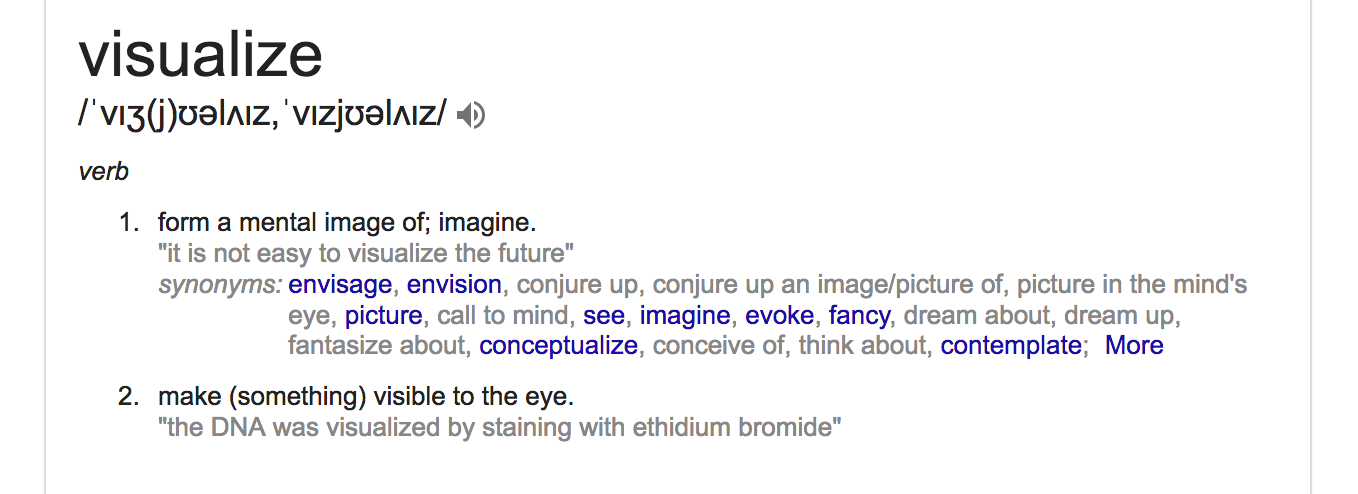

In [2]:
from IPython.display import Image
Image(filename='img/Visualise.png')

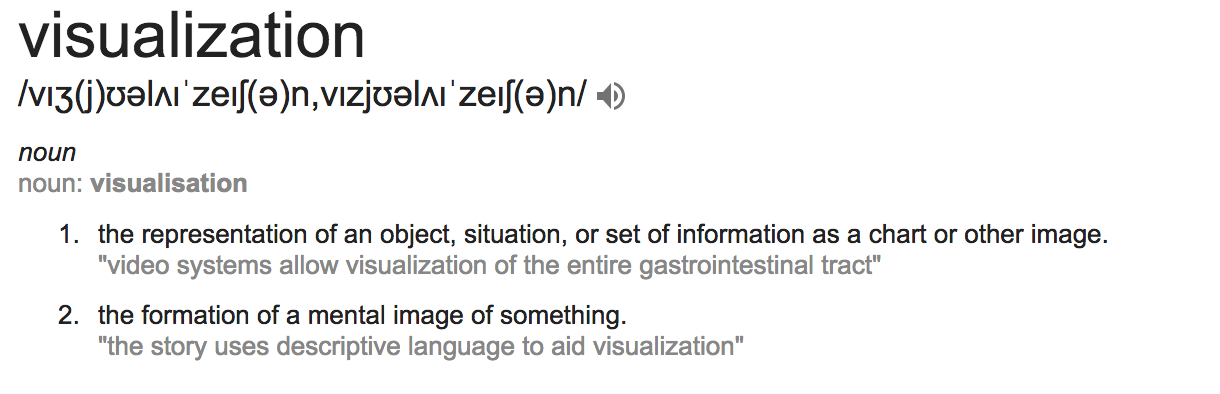

In [3]:
Image(filename='img/Visualisation.png')

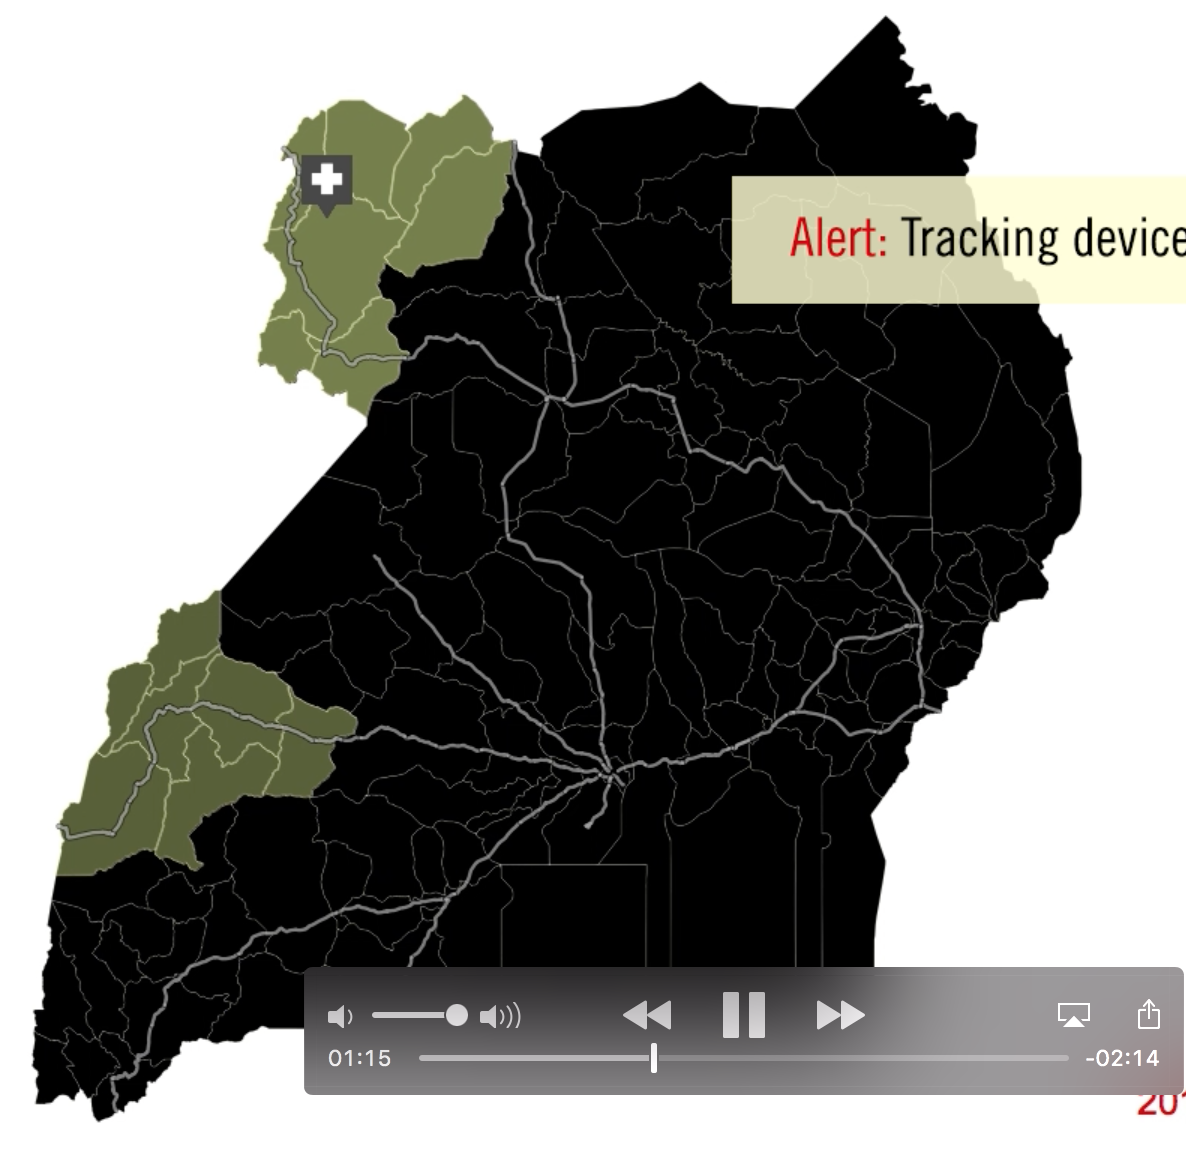

In [4]:
Image(filename='img/AmbulanceProject.png', width='600')

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data/AmbulanceDataDownloadsx.xlsx'
xl = pd.ExcelFile(filename)
cols = ['eginehrs','numOutofRegion','wasStationary','numOfgt100kmph','totalDistance','wasOffline']
sheetList = xl.sheet_names
dfAll = pd.DataFrame()
for sheetname in sheetList:
    names=sheetname.split('-')
    owner = names[2]
    region =names[1]
    df = pd.read_excel(filename,sheetname=sheetname)
    dfx = df[cols].sum().to_frame(sheetname)
    dfx.loc['region']=region
    dfx.loc['owner']=owner
    if dfAll.empty:
        dfAll=dfx
    else:
        dfAll=pd.concat([dfAll,dfx],axis=1)
    
dfAll

,A01-WestNile-Partner1,A02-WestNile-Partner1,A03-WestNile-Partner2,A04-Rwenzori-Partner1,A05-Rwenzori-Partner2,A06-WestNile-Partner2,A07-WestNile-Partner2,A08-Rwenzori-Partner1,A09-Rwenzori-Partner1,A10-Rwenzori-Partner1,...,A12-Rwenzori-Partner2,A13-WestNile-Partner2,A14-WestNile-Partner2,A15-WestNile-Partner1,A16-WestNile-Partner2,A17-WestNile-Partner1,A18-Rwenzori-Partner2,A19-Rwenzori-Partner2,A20-WestNile-Partner1,A21-Rwenzori-Partner2
eginehrs,240.291,57.4917,158.67,343.927,353.211,321.079,259.532,356.173,322.886,311.617,...,204.602,9.81472,200.561,67.1567,130.068,165.159,38.5286,127.937,161.59,154.776
numOutofRegion,1,2,11,22,16,6,12,12,14,0,...,7,0,12,6,2,7,15,0,8,7
wasStationary,12,56,25,6,9,4,8,3,32,15,...,19,26,26,2,18,4,27,31,5,34
numOfgt100kmph,0,15,22,24,9,23,36,21,21,0,...,38,5,12,7,36,21,4,42,15,20
totalDistance,6804.03,5487.1,7821.26,16607.8,31556.1,13483.2,10082.3,11863.3,9902.79,2456.01,...,15167.6,441.106,22228,3227.06,5406.73,9646.16,1393.09,23051.7,6766.08,33713.4
wasOffline,8,8,15,NaN,23,12,10,18,NaN,NaN,...,NaN,50,8,57,10,1,42,NaN,12,NaN
region,WestNile,WestNile,WestNile,Rwenzori,Rwenzori,WestNile,WestNile,Rwenzori,Rwenzori,Rwenzori,...,Rwenzori,WestNile,WestNile,WestNile,WestNile,WestNile,Rwenzori,Rwenzori,WestNile,Rwenzori
owner,Partner1,Partner1,Partner2,Partner1,Partner2,Partner2,Partner2,Partner1,Partner1,Partner1,...,Partner2,Partner2,Partner2,Partner1,Partner2,Partner1,Partner2,Partner2,Partner1,Partner2


In [12]:
dfAllT = dfAll.T
dfAllT.head()

,eginehrs,numOutofRegion,wasStationary,numOfgt100kmph,totalDistance,wasOffline,region,owner
A01-WestNile-Partner1,240.291,1,12,0,6804.03,8,WestNile,Partner1
A02-WestNile-Partner1,57.4917,2,56,15,5487.1,8,WestNile,Partner1
A03-WestNile-Partner2,158.67,11,25,22,7821.26,15,WestNile,Partner2
A04-Rwenzori-Partner1,343.927,22,6,24,16607.8,NaN,Rwenzori,Partner1
A05-Rwenzori-Partner2,353.211,16,9,9,31556.1,23,Rwenzori,Partner2


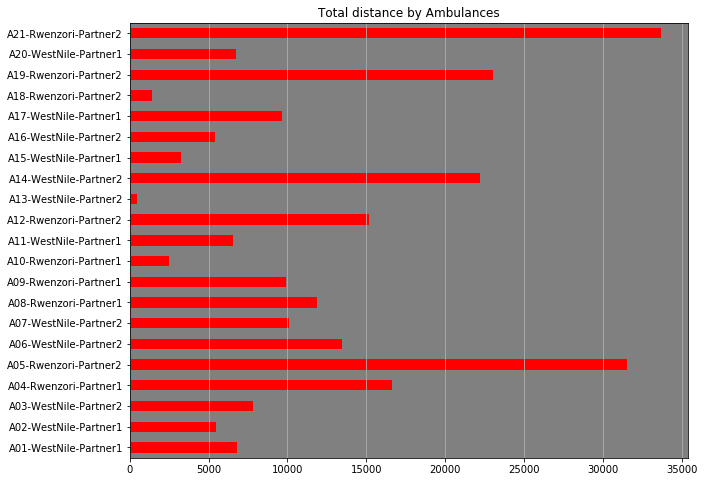

In [7]:
ax = dfAll.loc['totalDistance'].plot(kind='barh',figsize=(10,8),sort_columns=True,color='red',title='Total distance by Ambulances')
ax.set_facecolor("grey")
# ax.yaxis.grid()
ax.xaxis.grid()

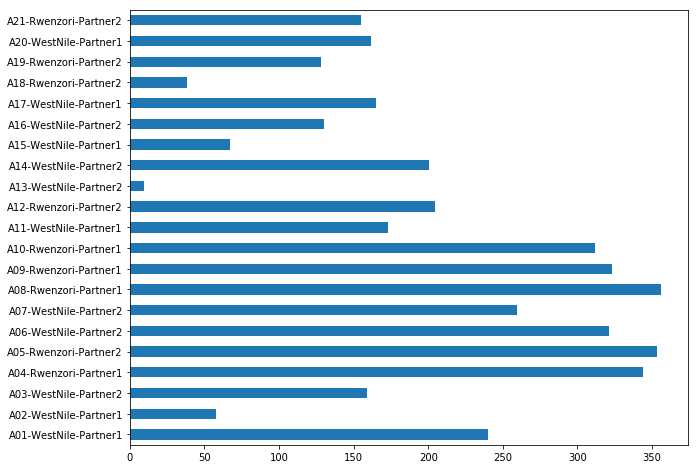

In [9]:
dfAll.loc['eginehrs'].plot(kind='barh',figsize=(10,8),sort_columns=True)

11601.3028305


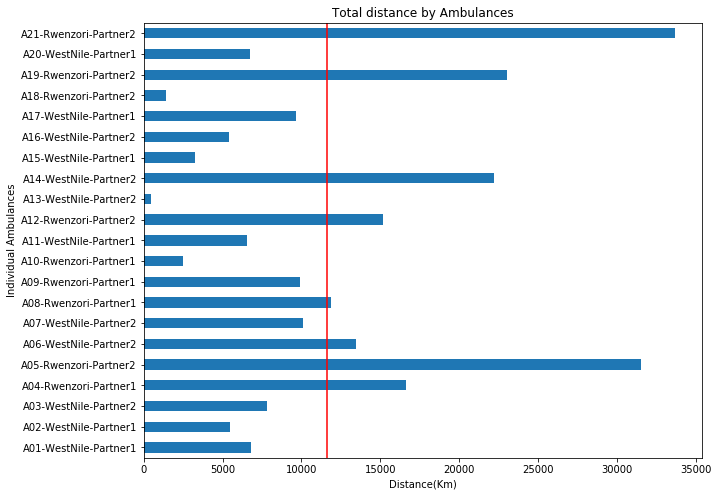

In [8]:
ax = dfAllT['totalDistance'].plot(kind='barh',figsize=(10,8),sort_columns=True,title='Total distance by Ambulances')
meanx = dfAllT['totalDistance'].mean()
print meanx
ax.axvline(x=meanx, color='r', label='average distance')
ax.set_xlabel('Distance(Km)')
ax.set_ylabel('Individual Ambulances')

11601.3028305


/Users/admin/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


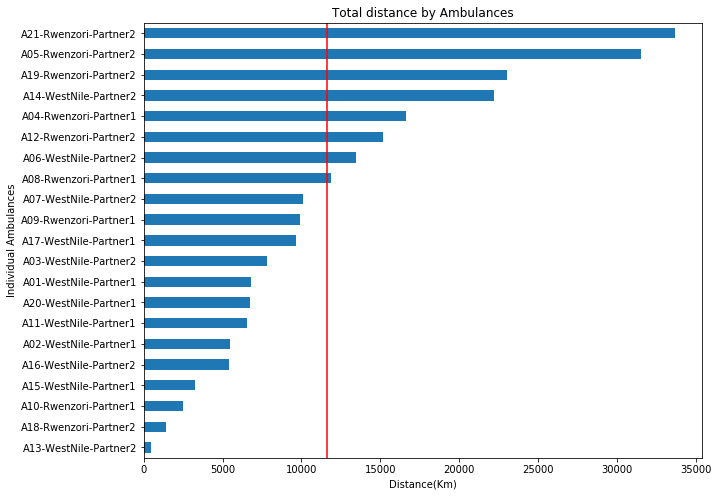

In [191]:
dfAllT.sort(columns=['totalDistance'], axis=0, ascending=True, inplace=True)
ax=dfAllT['totalDistance'].plot(kind='barh',figsize=(10,8),sort_columns=True,title='Total distance by Ambulances')
meanx = dfAllT['totalDistance'].mean()
print meanx
ax.axvline(x=meanx, color='r', label='average distance')
ax.set_xlabel('Distance(Km)')
ax.set_ylabel('Individual Ambulances')

In [89]:
dfAll.loc['wasOffline']

UAL116J-WestNile-Govt        8
UG4491M-WestNile-Govt        8
UG4198M-WestNile-Enabel     15
UG3640M-WestNile-Govt        2
UG3642M-Rwenzori-Govt      NaN
UG4192M-Rwenzori-Enabel    NaN
UG4190M-Rwenzori-Enabel     23
UAL658J-Rwenzori-Govt       39
UG4200M-WestNile-Enabel     12
UG4413M-WestNile-Enabel     10
UAL920J-Rwenzori-Govt       18
UAL662J-Rwenzori-Govt      NaN
LG001150-Rwenzori-Govt     NaN
UG2147M-WestNile-Govt       12
UG4191M-Rwenzori-Enabel    NaN
UG4197M-WestNile-Enabel     50
UG5566M-Rwenzori-Govt        3
UG4193M-WestNile-Enabel      8
UG4594M-WestNile-Govt       57
UG4199M-WestNile-Enabel     10
LG0011057-WestNile-Govt      1
UG4194M-Rwenzori-Enabel     42
UG4186M-Rwenzori-Enabel    NaN
UG4490M-WestNile-Govt       12
UG4189M-Rwenzori-Enabel    NaN
Name: wasOffline, dtype: object

In [150]:
dfAll.plot?

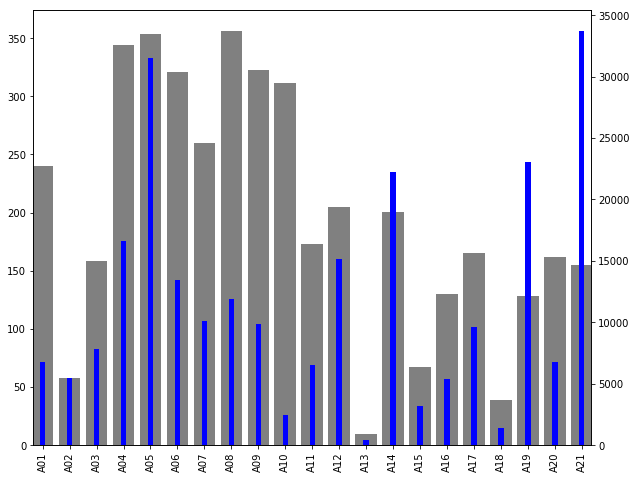

In [202]:
ax = dfAll.loc['eginehrs'].plot(kind='bar',figsize=(10,8),sort_columns=True,width=0.8,color='grey')
dfAll.loc['totalDistance'].plot(kind='bar',ax=ax, width=0.2, color='blue',secondary_y=True)

### Ex 2: Improve the readability of the above plot 


In [ ]:
#Exercise 



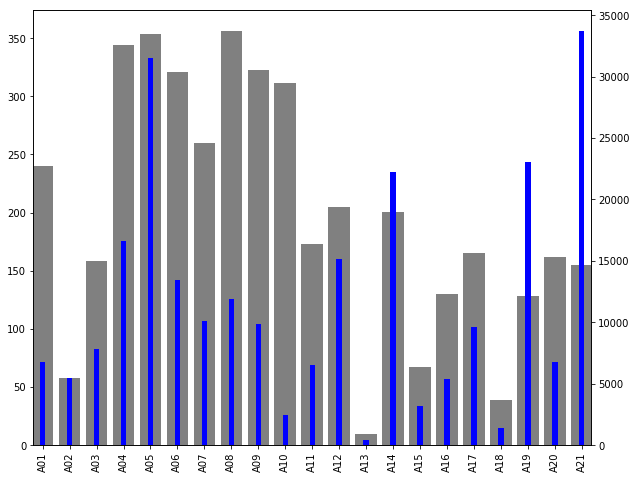

In [203]:
renameDict={col:col[0:3] for col in dfAll.columns.tolist()}
dfAll.rename(columns=renameDict,inplace=True)

ax = dfAll.loc['eginehrs'].plot(kind='bar',figsize=(10,8),sort_columns=True,width=0.8,color='grey')
dfAll.loc['totalDistance'].plot(kind='bar',ax=ax, width=0.2, color='blue',secondary_y=True)

In [147]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
def drawSpider(df,catgoryCol, category1, category2):
    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values=df.loc[0].drop(catgoryCol).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=category1)
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=df.loc[1].drop(catgoryCol).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=category2)
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [143]:
dfSpider = dfAllT.pivot_table(index = ['owner'],values = cols, aggfunc=np.sum )
dfSpider.reset_index(inplace=True)
dfSpider=dfSpider[['owner','numOutofRegion','wasStationary','numOfgt100kmph','wasOffline']]
dfSpider

,owner,numOutofRegion,wasStationary,numOfgt100kmph,wasOffline
0,Partner1,72.0,162.0,138.0,116.0
1,Partner2,88.0,227.0,247.0,170.0


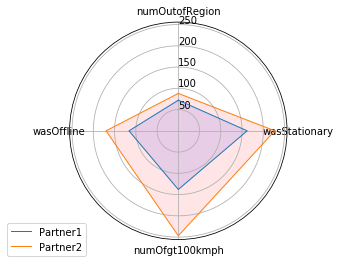

In [144]:
catgoryCol='owner' 
category1 ='Partner1' 
category2 = 'Partner2' 
drawSpider(dfSpider,catgoryCol, category1, category2)    

In [145]:
dfSpider = dfAllT.pivot_table(index = ['region'],values = cols, aggfunc=np.sum )
dfSpider.reset_index(inplace=True)
dfSpider=dfSpider[['region','numOutofRegion','wasStationary','numOfgt100kmph','wasOffline']]
dfSpider

,region,numOutofRegion,wasStationary,numOfgt100kmph,wasOffline
0,Rwenzori,93.0,176.0,179.0,83.0
1,WestNile,67.0,213.0,206.0,203.0


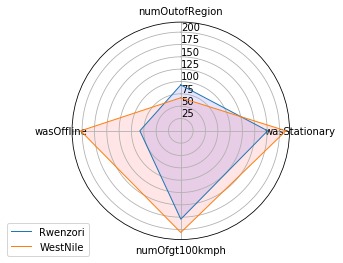

In [146]:
catgoryCol='region' 
category1 ='Rwenzori' 
category2 = 'WestNile' 
drawSpider(dfSpider,catgoryCol, category1, category2) 

In [14]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('bmh')

In [19]:
dfxx =pd.read_csv('data/countsPerDistricts.csv')
filenamex='data/GeoUgandaDistricts2016_UBOS.shp'
gdf = geopandas.GeoDataFrame.from_file(filenamex)
dfxx.head(17)

,Unnamed: 0,district,counts
0,0,ABIM,0
1,1,ADJUMANI,0
2,2,AGAGO,0
3,3,ALEBTONG,0
4,4,AMOLATAR,0
5,5,AMUDAT,0
6,6,AMURIA,0
7,7,AMURU,0
8,8,APAC,0
9,9,ARUA,144162


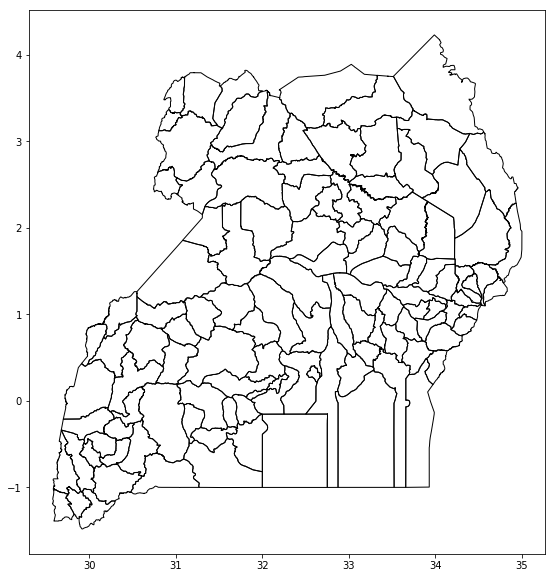

In [25]:
ax = gdf.plot(figsize=(10,10), color='white',edgecolor='black',alpha=0.99)

In [26]:
gdfx = gdf.merge(dfxx, left_on='DNAME2016',right_on='district',how='inner')
gdfx.columns

listLong=[]
listLat=[]
for index, row in gdf.iterrows(): 
#     print row.geometry.centroid.x 
    listLong.append(row.geometry.centroid.x )
    listLat.append(row.geometry.centroid.y )    
gdfx['long']=listLong
gdfx['lat']=listLat

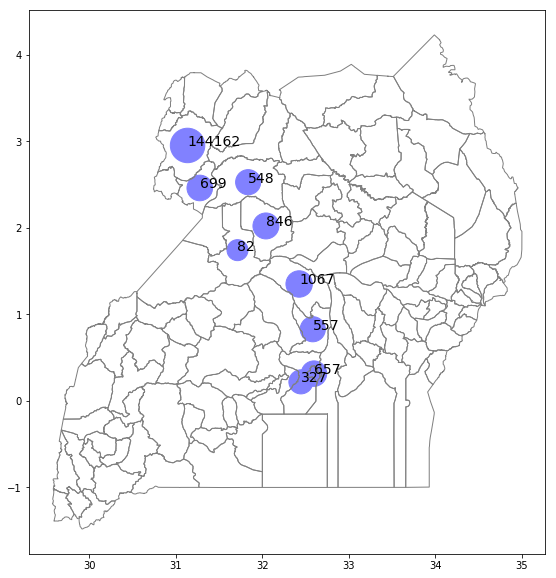

In [27]:
ax = gdfx.plot(figsize=(10,10),color='white',edgecolor='gray',alpha=0.5)
plt.scatter(y=gdfx["lat"], x=gdfx["long"], alpha=0.99, c='blue',s = 100*np.log(gdfx['counts']))

gdfxp = gdfx[gdfx['counts']>0]

for i in gdfxp.index:
    ax.annotate(gdfxp.loc[i]['counts'], (gdfxp.loc[i]['long'],gdfxp.loc[i]['lat']),fontsize=14)
plt.show()

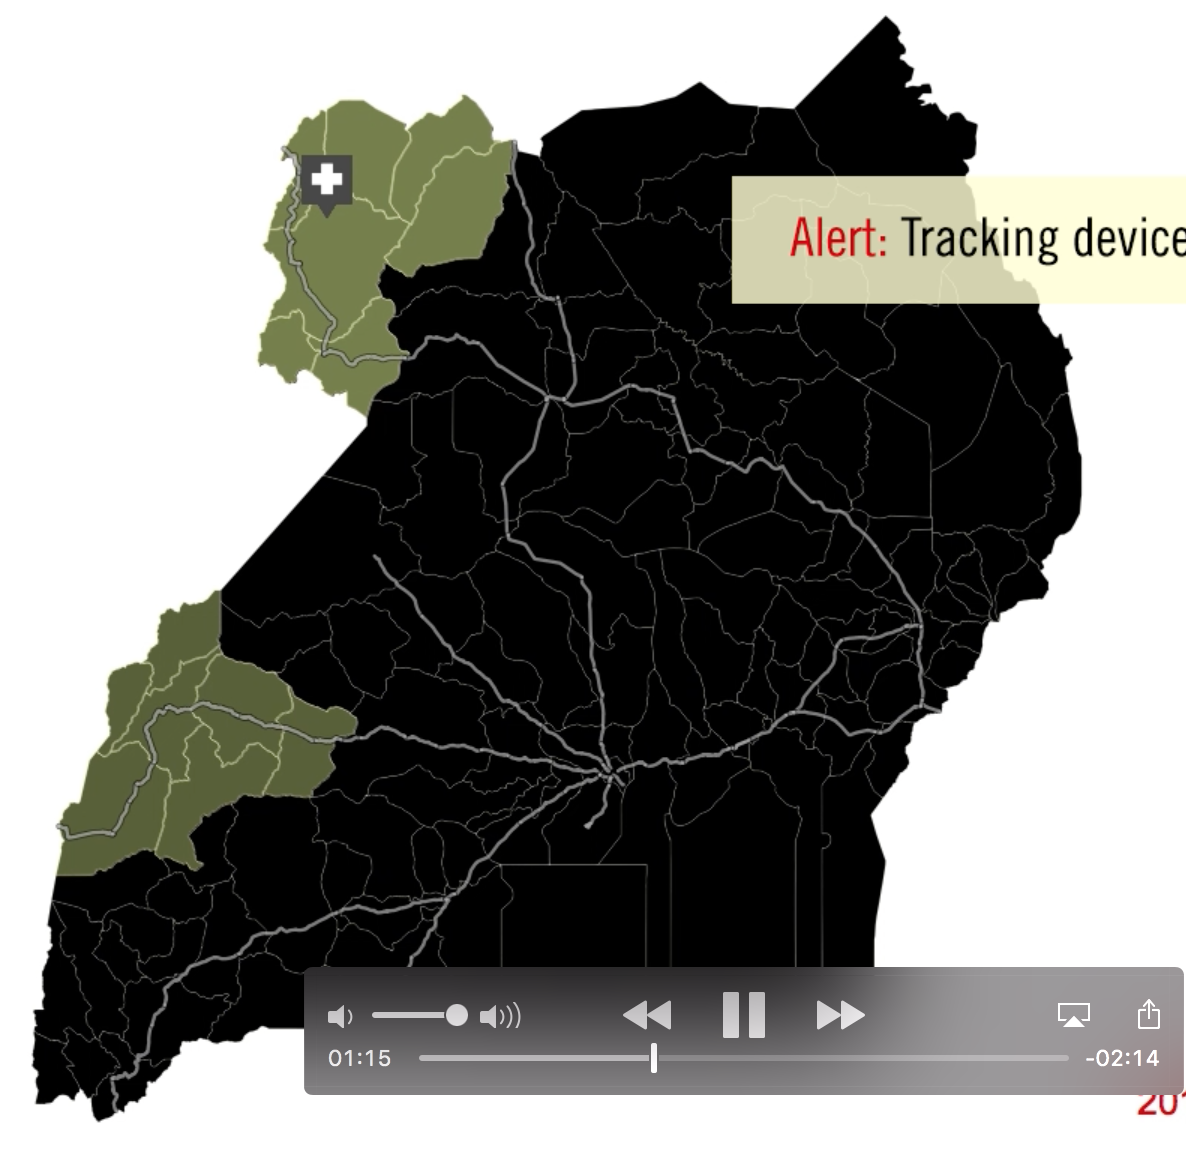

In [31]:
Image(filename='img/AmbulanceProject.png', width='600')

## Ex 2: Using the data here draw a lollipop graph using the sample code here

[ 0.1  1.1  2.1  3.1  4.1] [ 0.29508983  0.85862216  0.12660369  0.29137709  0.2631209 ]


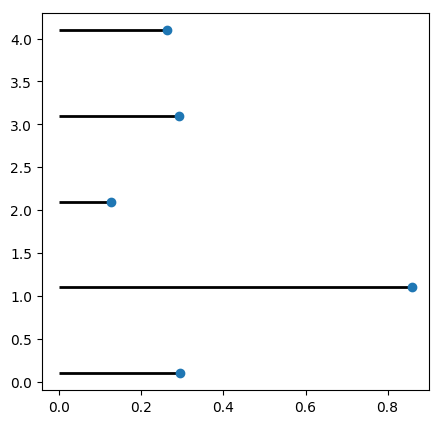

In [106]:
import matplotlib.pyplot as plt
from numpy import *
# from scipy import *
bars = arange(5) + 0.1
vals = rand(5)
print bars, vals
plt.figure(figsize=(5,5), dpi=100)
# spines = ["bottom"]
# ax = plt.subplot(1, 1, 1)
# for loc, spine in ax.spines.iteritems():
#   if loc not in spines:
#     spine.set_color('none')
# # don't draw ytick marks
# #ax.yaxis.set_tick_params(size=0)
# ax.xaxis.set_ticks_position('bottom')
# plt.barh(bars, vals, align="center")
plt.plot(vals, bars, 'o')
plt.hlines(bars, [0], vals, linestyles='solid', lw=2)
plt.savefig("test.png") 

#Tufte’s Principles of Graphical Excellence

# Give the viewer
## *the greatest number of ideas
## *in the shortest time
## *with the least ink in the smallest space.

# Tell the truth about the data!